In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
PROJECT = "qwiklabs-gcp-ml-49b827b781ab"  # Replace with your PROJECT
BUCKET = PROJECT  # Replace with your BUCKET
REGION = "us-central1"            # Choose an available region for Cloud CAIP
TFVERSION = "1.14"                # TF version for CMLE to use
PROJ_NAME='miniproj'

In [3]:
import os
os.environ["BUCKET"] = BUCKET
os.environ["PROJECT"] = PROJECT
os.environ["REGION"] = REGION
os.environ["TFVERSION"] = TFVERSION
os.environ["PROJ_NAME"] = PROJ_NAME

In [71]:
FEATURE_LEN = 29
os.environ['FEATURE_LEN'] = str(FEATURE_LEN)

# 모델 실행

In [72]:
try:
    MODEL_NAME=input('모델 이름을 이력하세요:')
    if len(MODEL_NAME) < 1:
        MODEL_NAME='linear'
except ValueError:
    MODEL_NAME='linear'
os.environ["MODEL_NAME"] = MODEL_NAME
print(MODEL_NAME)

모델 이름을 이력하세요: dnnclass


dnnclass


In [114]:
%%bash
# MODEL_NAME=linear
DATADIR=$(pwd)
OUTDIR=$(pwd)/trained_${MODEL_NAME}/${PROJ_NAME}_v1
rm -rf $OUTDIR
echo $OUTDIR
echo ${PROJ_NAME}_v1.trainer.task
echo ${PWD}/${PROJ_NAME}_v1.trainer
gcloud ai-platform local train \
   --module-name=${PROJ_NAME}_v1.trainer.task \
   --package-path=${PWD}/${PROJ_NAME}_v1.trainer \
   -- \
   --train_data_path="${DATADIR}/input/train_smote_time_amount_minus.csv" \
   --eval_data_path="${DATADIR}/input/valid_time_amount_minus.csv"  \
   --output_dir=${OUTDIR} \
   --model=${MODEL_NAME} \
   --train_steps=2 \
   --feature_length=$FEATURE_LEN \
   --learning_rate=0.0001 \
   --eval_delay_secs=1 \
   --min_eval_frequency=10 \
   --stop_loss=0 \
   --nnsize='100,10'

/home/jupyter/google-asl-study/final_mini_project/youn/trained_dnnclass/miniproj_v1
miniproj_v1.trainer.task
/home/jupyter/google-asl-study/final_mini_project/youn/miniproj_v1.trainer
Will use DNN size of [100, 10]
NNSIZE:[100, 10]
NNSIZE:[100, 10]
NNSIZE:[100, 10]





INFO:tensorflow:TF_CONFIG environment variable: {u'environment': u'cloud', u'cluster': {}, u'job': {u'args': [u'--train_data_path=/home/jupyter/google-asl-study/final_mini_project/youn/input/train_smote_time_amount_minus.csv', u'--eval_data_path=/home/jupyter/google-asl-study/final_mini_project/youn/input/valid_time_amount_minus.csv', u'--output_dir=/home/jupyter/google-asl-study/final_mini_project/youn/trained_dnnclass/miniproj_v1', u'--model=dnnclass', u'--train_steps=2', u'--feature_length=29', u'--learning_rate=0.0001', u'--eval_delay_secs=1', u'--min_eval_frequency=10', u'--stop_loss=0', u'--nnsize=100,10'], u'job_name': u'miniproj_v1.trainer.task'}, u'task': {}}
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 10, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f48d09f0dd0>, '_model_dir': '/home/jupyter/google-asl-stu

CalledProcessError: Command 'b'# MODEL_NAME=linear\nDATADIR=$(pwd)\nOUTDIR=$(pwd)/trained_${MODEL_NAME}/${PROJ_NAME}_v1\nrm -rf $OUTDIR\necho $OUTDIR\necho ${PROJ_NAME}_v1.trainer.task\necho ${PWD}/${PROJ_NAME}_v1.trainer\ngcloud ai-platform local train \\\n   --module-name=${PROJ_NAME}_v1.trainer.task \\\n   --package-path=${PWD}/${PROJ_NAME}_v1.trainer \\\n   -- \\\n   --train_data_path="${DATADIR}/input/train_smote_time_amount_minus.csv" \\\n   --eval_data_path="${DATADIR}/input/valid_time_amount_minus.csv"  \\\n   --output_dir=${OUTDIR} \\\n   --model=${MODEL_NAME} \\\n   --train_steps=2 \\\n   --feature_length=$FEATURE_LEN \\\n   --learning_rate=0.0001 \\\n   --eval_delay_secs=1 \\\n   --min_eval_frequency=10 \\\n   --stop_loss=0 \\\n   --nnsize=\'100,10\'\n'' returned non-zero exit status 1

In [24]:
%%bash
# MODEL_NAME=linear
DATADIR=$(pwd)
OUTDIR=gs://${BUCKET}/${PROJ_NAME}/${MODEL_NAME}
JOBNAME=${PROJ_NAME}_${MODEL_NAME}_$(date -u +%y%m%d_%H%M%S)

rm -rf $OUTDIR
gcloud ai-platform jobs submit training $JOBNAME \
    --region=$REGION \
    --module-name=trainer.task \
    --package-path=${PWD}/${PROJ_NAME}/trainer \
    --job-dir=$OUTDIR \
    --scale-tier=BASIC \
    --runtime-version=$TFVERSION \
    -- \
    --train_data_path="gs://${BUCKET}/${PROJ_NAME}/input/train_smote.csv" \
    --eval_data_path="gs://${BUCKET}/${PROJ_NAME}/input/valid.csv"  \
    --output_dir=${OUTDIR} \
    --model=${MODEL_NAME} \
    --train_steps=2000 \
    --feature_length=$FEATURE_LEN \
    --learning_rate=0.0001 \
    --eval_delay_secs=1 \
    --min_eval_frequency=10 \
    --stop_loss=1 \
    --nnsize='30,10'

jobId: miniproj_dnnclass_191210_064953
state: QUEUED


Job [miniproj_dnnclass_191210_064953] submitted successfully.
Your job is still active. You may view the status of your job with the command

  $ gcloud ai-platform jobs describe miniproj_dnnclass_191210_064953

or continue streaming the logs with the command

  $ gcloud ai-platform jobs stream-logs miniproj_dnnclass_191210_064953


In [25]:
from datetime import datetime
timestamp = 1576115790
dt_object = datetime.fromtimestamp(timestamp)
print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2019-12-12 01:56:30
type(dt_object) = <class 'datetime.datetime'>


In [52]:
loaded_model = tf.contrib.predictor.from_saved_model('/home/jupyter/google-asl-study/final_mini_project/youn/trained_dnnclass/miniproj_v1/export/exporter/1576122060')

INFO:tensorflow:Restoring parameters from /home/jupyter/google-asl-study/final_mini_project/youn/trained_dnnclass/miniproj_v1/export/exporter/1576122060/variables/variables


In [53]:
loaded_model

SavedModelPredictor with feed tensors {'Class': <tf.Tensor 'Placeholder:0' shape=(?, 30) dtype=float32>} and fetch_tensors {'predicted': <tf.Tensor 'dense_2/Sigmoid:0' shape=(?, 1) dtype=float32>}

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_predictions(estimator, input_fn):
    result =loaded_model({'Class':input_fn})
    return result
def eval_input_fn(csv_path):
    from numpy import genfromtxt
    data = genfromtxt(csv_path, delimiter=',')
    data = data[1:,:-1]
    return data

result = get_predictions(loaded_model, eval_input_fn('./input/valid.csv'))
result

{'predicted': array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32)}

[[45486     0]
 [   83     0]]


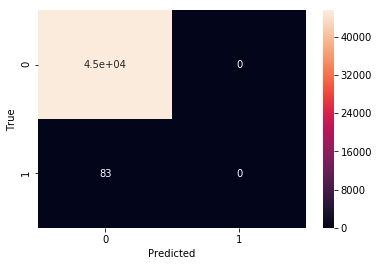

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_predictions(estimator, input_fn):
    result =loaded_model({'Class':input_fn})
    return result['predicted']

def eval_input_fn(csv_path):
    from numpy import genfromtxt
    data = genfromtxt(csv_path, delimiter=',')
    data = data[1:,:-1]
    return data

LABELS = ["0", "1"]

df_eval = pd.read_csv('./input/valid.csv')

# Create a confusion matrix on training data.
with tf.Graph().as_default():
    cm = tf.confusion_matrix(df_eval["Class"],get_predictions(loaded_model, eval_input_fn('./input/valid.csv')))
    with tf.Session() as session:
        cm_out = session.run(cm)
        print(cm_out)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) 
# / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

# yamul파일 사용

In [29]:
%%writefile hyperparam.yaml
trainingInput:
    scaleTier: PREMIUM_1
    hyperparameters:
        hyperparameterMetricTag: RMSE
        goal: MINIMIZE
        maxTrials: 4
        maxParallelTrials: 2
        enableTrialEarlyStopping: True
        params:
        - parameterName: nnsize
          type: CATEGORICAL
          categoricalValues:
          - 30,10
          - 100,10
          - 30,100
          - 30,10,30        

Overwriting hyperparam.yaml


In [30]:
%%bash
# MODEL_NAME=linear
DATADIR=$(pwd)
OUTDIR=gs://${BUCKET}/${PROJ_NAME}/${MODEL_NAME}_HParam
JOBNAME=${PROJ_NAME}_${MODEL_NAME}_$(date -u +%y%m%d_%H%M%S)

rm -rf $OUTDIR
gcloud ai-platform jobs submit training $JOBNAME \
    --region=$REGION \
    --module-name=trainer.task \
    --package-path=${PWD}/${PROJ_NAME}/trainer \
    --job-dir=$OUTDIR \
    --scale-tier=PREMIUM_1 \
    --runtime-version=$TFVERSION \
    --config=hyperparam.yaml \
    -- \
    --train_data_path="gs://${BUCKET}/${PROJ_NAME}/input/train_smote.csv" \
    --eval_data_path="gs://${BUCKET}/${PROJ_NAME}/input/valid.csv"  \
    --output_dir=${OUTDIR} \
    --model=${MODEL_NAME} \
    --train_steps=2000 \
    --feature_length=$FEATURE_LEN \
    --learning_rate=0.0001 \
    --eval_delay_secs=1 \
    --min_eval_frequency=10 \
    --stop_loss=1 \
    --nnsize='30,10'

jobId: miniproj_dnnclass_191210_071526
state: QUEUED


Job [miniproj_dnnclass_191210_071526] submitted successfully.
Your job is still active. You may view the status of your job with the command

  $ gcloud ai-platform jobs describe miniproj_dnnclass_191210_071526

or continue streaming the logs with the command

  $ gcloud ai-platform jobs stream-logs miniproj_dnnclass_191210_071526


# 코드 생성

In [19]:
%%bash
mkdir -p ${PROJ_NAME}_v1/trainer
touch ${PROJ_NAME}_v1/__init__.py
touch ${PROJ_NAME}_v1/trainer/__init__.py

In [103]:
%%writefile {PROJ_NAME}_v1/trainer/task.py
# Copyright 2017 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""Example implementation of code to run on the Cloud ML service.
"""

import traceback
import argparse
import json
import os
from . import model

if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  # Input Arguments
  parser.add_argument(
      '--train_data_path',
      help='GCS or local path to training data',
      required=True
  )
  parser.add_argument(
      '--eval_data_path',
      help='GCS or local path to evaluation data',
      required=True
  )
  parser.add_argument(
      '--train_batch_size',
      help='Batch size for training steps',
      type=int,
      default=2
  )
  parser.add_argument(
        "--nnsize",
        help="Hidden layer sizes to use for DNN feature columns -- provide \
        space-separated layers",
        type=str,
        default='128,32,4'
  )
  parser.add_argument(
      '--learning_rate',
      help='Initial learning rate for training',
      type=float,
      default=0.01
  )
  parser.add_argument(
      '--train_steps',
      help="""\
      Steps to run the training job for. A step is one batch-size,\
      """,
      type=int,
      default=0
  )
  parser.add_argument(
      '--feature_length',
      help="""\
      This model works with fixed length sequences. 1-(N-1) are inputs, last is output
      """,
      type=int,
      default=10
  )
  parser.add_argument(
      '--output_dir',
      help='GCS location to write checkpoints and export models',
      required=True
  )
  model_names = [name.replace('_model','') \
                   for name in dir(model) \
                     if name.endswith('_model')]
  parser.add_argument(
      '--model',
      help='Type of model. Supported types are {}'.format(model_names),
      required=True
  )
  parser.add_argument(
      '--job-dir',
      help='this model ignores this field, but it is required by gcloud',
      default='junk'
  )
  parser.add_argument(
      '--eval_delay_secs',
      help='How long to wait before running first evaluation',
      default=10,
      type=int
  )
  parser.add_argument(
      '--min_eval_frequency',
      help='Minimum number of training steps between evaluations',
      default=60,
      type=int
  )
  parser.add_argument(
      '--stop_loss',
      help='Value of Early Stopping Loss',
      default=1,
      type=int
  )

  args = parser.parse_args()
  hparams = args.__dict__
  
  # unused args provided by service
  hparams.pop('job_dir', None)
  hparams.pop('job-dir', None)

  output_dir = hparams.pop('output_dir')
  model.BATCH_SIZE = hparams['train_batch_size']
  model.NNSIZE = list(map(int, hparams.pop("nnsize").split(",")))
  print ("Will use DNN size of {}".format(model.NNSIZE))

  # Append trial_id to path if we are doing hptuning
  # This code can be removed if you are not using hyperparameter tuning
  output_dir = os.path.join(
      output_dir,
      json.loads(
          os.environ.get('TF_CONFIG', '{}')
      ).get('task', {}).get('trial', '')
  )

  # calculate train_steps if not provided
  if hparams['train_steps'] < 1:
     # 1,000 steps at batch_size of 100
     hparams['train_steps'] = (1000 * 100) // hparams['train_batch_size']
     print ("Training for {} steps".format(hparams['train_steps']))

  model.init(hparams)

  # Run the training job
  model.train_and_evaluate(output_dir, hparams)


Overwriting miniproj_v1/trainer/task.py


In [113]:
%%writefile {PROJ_NAME}_v1/trainer/model.py
#!/usr/bin/env python

# Copyright 2017 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np

tf.logging.set_verbosity(tf.logging.INFO)

LABLE_COL = 'Class'
N_OUTPUTS = 1  # in each sequence, 1-49 are features, and 50 is label
FEATURE_LEN = None
DEFAULTS = None
N_INPUTS = None
BATCH_SIZE = 512
NNSIZE = [64, 16, 4]


def init(hparams):
    global FEATURE_LEN, DEFAULTS, N_INPUTS
    FEATURE_LEN = hparams['feature_length']
    DEFAULTS = [[0.0] for x in range(0, FEATURE_LEN)]
    N_INPUTS = FEATURE_LEN - N_OUTPUTS


def linear_model(features, mode, params):
    X = features[LABLE_COL]
    predictions = tf.layers.dense(X, 1, activation=None)
    return predictions


def dnn_model(features, mode, params):
    X = features[LABLE_COL]
    print('NNSIZE:{}'.format(NNSIZE))
    for unit_num in NNSIZE:
        X = tf.layers.dense(X, units=unit_num, activation=tf.nn.relu)
    predictions = tf.layers.dense(X, 1, activation=None)  # linear output: regression
    return predictions


def dnnclass_model(features, mode, params):
    X = features[LABLE_COL]
    print('NNSIZE:{}'.format(NNSIZE))
    #X = tf.Print(X, [X[:5]], summarize=-1)
    #for unit_num in NNSIZE:
    #    X = tf.layers.dense(X, units=unit_num, activation=tf.nn.relu)

    X = tf.layers.dense(X, units=100, activation=tf.nn.relu)
    X = tf.layers.dense(X, units=10, activation=tf.nn.relu)
    predictions = tf.layers.dense(X, 1, activation=tf.nn.softmax)
    #probability = tf.layers.dense(X, 1, activation=tf.nn.sigmoid)

    return predictions  #, probability


def cnn_model(features, mode, params):
    X = tf.reshape(features[LABLE_COL],
                   [-1, N_INPUTS, 1])  # as a 1D "sequence" with only one time-series observation (height)
    c1 = tf.layers.conv1d(X, filters=N_INPUTS // 2,
                          kernel_size=3, strides=1,
                          padding='same', activation=tf.nn.relu)
    p1 = tf.layers.max_pooling1d(c1, pool_size=2, strides=2)

    c2 = tf.layers.conv1d(p1, filters=N_INPUTS // 2,
                          kernel_size=3, strides=1,
                          padding='same', activation=tf.nn.relu)
    p2 = tf.layers.max_pooling1d(c2, pool_size=2, strides=2)

    outlen = p2.shape[1] * p2.shape[2]
    c2flat = tf.reshape(p2, [-1, outlen])
    h1 = tf.layers.dense(c2flat, 3, activation=tf.nn.relu)
    predictions = tf.layers.dense(h1, 1, activation=None)  # linear output: regression
    return predictions


def rnn_model(features, mode, params):
    CELL_SIZE = N_INPUTS // 3  # size of the internal state in each of the cells

    # 1. dynamic_rnn needs 3D shape: [BATCH_SIZE, N_INPUTS, 1]
    x = tf.reshape(features[LABLE_COL], [-1, N_INPUTS, 1])

    # 2. configure the RNN
    cell = tf.nn.rnn_cell.GRUCell(CELL_SIZE)
    outputs, state = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)

    # 3. pass rnn output through a dense layer
    h1 = tf.layers.dense(state, N_INPUTS // 2, activation=tf.nn.relu)
    predictions = tf.layers.dense(h1, 1, activation=None)  # (?, 1)
    return predictions


# 2-layer RNN
def rnn2_model(features, mode, params):
    # dynamic_rnn needs 3D shape: [BATCH_SIZE, N_INPUTS, 1]
    x = tf.reshape(features[LABLE_COL], [-1, N_INPUTS, 1])

    # 2. configure the RNN
    cell1 = tf.nn.rnn_cell.GRUCell(N_INPUTS * 2)
    cell2 = tf.nn.rnn_cell.GRUCell(N_INPUTS // 2)
    cells = tf.nn.rnn_cell.MultiRNNCell([cell1, cell2])
    outputs, state = tf.nn.dynamic_rnn(cells, x, dtype=tf.float32)
    # 'state' is now a tuple containing the final state of each cell layer
    # we use state[1] below to extract the final state of the final layer
    
    # 3. pass rnn output through a dense layer
    h1 = tf.layers.dense(state[1], cells.output_size // 2, activation=tf.nn.relu)
    predictions = tf.layers.dense(h1, 1, activation=None)  # (?, 1)
    return predictions


# create N-1 predictions
def rnnN_model(features, mode, params):
    # dynamic_rnn needs 3D shape: [BATCH_SIZE, N_INPUTS, 1]
    x = tf.reshape(features[LABLE_COL], [-1, N_INPUTS, 1])

    # 2. configure the RNN
    cell1 = tf.nn.rnn_cell.GRUCell(N_INPUTS * 2)
    cell2 = tf.nn.rnn_cell.GRUCell(N_INPUTS // 2)
    cells = tf.nn.rnn_cell.MultiRNNCell([cell1, cell2])
    outputs, state = tf.nn.dynamic_rnn(cells, x, dtype=tf.float32)
    # 'outputs' contains the state of the final layer for every time step
    # not just the last time step (?,N_INPUTS, final cell size)
    
    # 3. pass state for each time step through a DNN, to get a prediction
    # for each time step 
    h1 = tf.layers.dense(outputs, cells.output_size, activation=tf.nn.relu)
    h2 = tf.layers.dense(h1, cells.output_size // 2, activation=tf.nn.relu)
    predictions = tf.layers.dense(h2, 1, activation=None)  # (?, N_INPUTS, 1)
    predictions = tf.reshape(predictions, [-1, N_INPUTS])
    return predictions # return prediction for each time step


# read data and convert to needed format
def read_dataset(filename, mode, batch_size=512):
    def _input_fn():
        def decode_csv(row):
            # row is a string tensor containing the contents of one row
            features = tf.decode_csv(row, record_defaults=DEFAULTS)  # string tensor -> list of 50 rank 0 float tensors
            label = features.pop()  # remove last feature and use as label
            features = tf.stack(features)  # list of rank 0 tensors -> single rank 1 tensor
            return {LABLE_COL: features}, label

        # Create list of file names that match "glob" pattern (i.e. data_file_*.csv)
        dataset = tf.data.Dataset.list_files(filename)
        # Read in data from files
        dataset = dataset.flat_map(tf.data.TextLineDataset)
        # Parse text lines as comma-separated values (CSV)
        
        dataset = dataset.skip(1).map(decode_csv)

        if mode == tf.estimator.ModeKeys.TRAIN:
            num_epochs = None  # loop indefinitely
            dataset = dataset.shuffle(buffer_size=10 * batch_size)
        else:
            num_epochs = 1  # end-of-input after this

        dataset = dataset.repeat(num_epochs).batch(batch_size)
        return dataset.make_one_shot_iterator().get_next()

    return _input_fn


def serving_input_fn():
    feature_placeholders = {
        LABLE_COL: tf.placeholder(tf.float32, [None, N_INPUTS])
    }

    features = {
        key: tf.expand_dims(tensor, -1)
        for key, tensor in feature_placeholders.items()
    }
    features[LABLE_COL] = tf.squeeze(features[LABLE_COL], axis=[2])

    return tf.estimator.export.ServingInputReceiver(features, feature_placeholders)


def compute_errors(features, labels, predictions):
    labels = tf.expand_dims(labels, -1)  # rank 1 -> rank 2 to match rank of predictions
    if predictions.shape[1] == 1:
        #loss = tf.losses.mean_squared_error(labels, predictions)
        loss = tf.losses.sigmoid_cross_entropy(labels, predictions)
        rmse = tf.metrics.root_mean_squared_error(labels, predictions)
        return loss, rmse
    else:
        # one prediction for every input in sequence
        # get 1-N of (x + label)
        labelsN = tf.concat([features[LABLE_COL], labels], axis=1)
        labelsN = labelsN[:, 1:]
        # loss is computed from the last 1/3 of the series
        N = (2 * N_INPUTS) // 3
        #loss = tf.losses.mean_squared_error(labelsN[:, N:], predictions[:, N:])
        loss = tf.losses.sigmoid_cross_entropy(labelsN[:, N:], predictions[:, N:])
        # rmse is computed from last prediction and last label
        lastPred = predictions[:, -1]
        rmse = tf.metrics.root_mean_squared_error(labels, lastPred)
        return loss, rmse

# RMSE when predicting same as last value
def same_as_last_benchmark(features, labels):
    predictions = features[LABLE_COL][:,-1] # last value in input sequence
    return tf.metrics.root_mean_squared_error(labels, predictions)


# create the inference model
def data_regressor(features, labels, mode, params):
    # 1. run the appropriate model
    model_functions = {
        'linear': linear_model,
        'dnn': dnn_model,
        'dnnclass': dnnclass_model,
        'cnn': cnn_model,
        'rnn': rnn_model,
        'rnn2': rnn2_model,
        'rnnN': rnnN_model}
    model_function = model_functions[params['model']]
    predictions = model_function(features, mode, params)
    
    # 2. loss function, training/eval ops
    loss = None
    train_op = None
    eval_metric_ops = None
    
    labels      = tf.Print(labels,      [labels],      summarize=-1, message="\nlabels >> ")
    predictions = tf.Print(predictions, [predictions], summarize=-1, message="\npredictions >> ")
    #probability = tf.Print(probability, [probability], summarize=-1, message="\nprobability >> ")

    if mode == tf.estimator.ModeKeys.TRAIN or mode == tf.estimator.ModeKeys.EVAL:
        loss, rmse = compute_errors(features, labels, predictions)

        if mode == tf.estimator.ModeKeys.TRAIN:
            # this is needed for batch normalization, but has no effect otherwise
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
            with tf.control_dependencies(update_ops):
                # 2b. set up training operation
                train_op = tf.contrib.layers.optimize_loss(
                    loss,
                    tf.train.get_global_step(),
                    learning_rate=params['learning_rate'],
                    optimizer="Adam")

        # 2c. eval metric
        eval_metric_ops = {
            "RMSE": rmse,
            "RMSE_same_as_last": same_as_last_benchmark(features, labels),
        }

    # 3. Create predictions
    if predictions.shape[1] != 1:
        predictions = predictions[:, -1]  # last predicted value
    predictions_dict = {"predicted": predictions}

    # 4. return EstimatorSpec
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions_dict,
        loss=loss,
        train_op=train_op,
        eval_metric_ops=eval_metric_ops,
        export_outputs={
            'predictions': tf.estimator.export.PredictOutput(predictions_dict)}
    )


def train_and_evaluate(output_dir, hparams):
    tf.summary.FileWriterCache.clear() # ensure filewriter cache is clear for TensorBoard events file
    get_train = read_dataset(hparams['train_data_path'],
                             tf.estimator.ModeKeys.TRAIN,
                             hparams['train_batch_size'])
    get_valid = read_dataset(hparams['eval_data_path'],
                             tf.estimator.ModeKeys.EVAL,
                             1000)
    
    estimator = tf.estimator.Estimator(model_fn=data_regressor,
                                       params=hparams,
                                       config=tf.estimator.RunConfig(
                                           save_checkpoints_secs=
                                           hparams['min_eval_frequency']),
                                       model_dir=output_dir)
   
    train_spec = tf.estimator.TrainSpec(input_fn=get_train,
                                        max_steps=hparams['train_steps'],
                                        hooks=[tf.estimator.experimental.stop_if_no_decrease_hook(estimator, "loss", hparams['stop_loss'])])
    exporter = tf.estimator.LatestExporter('exporter', serving_input_fn)
    eval_spec = tf.estimator.EvalSpec(input_fn=get_valid,
                                      steps=None,
                                      exporters=exporter,
                                      start_delay_secs=hparams['eval_delay_secs'],
                                      throttle_secs=hparams['min_eval_frequency'])
    tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)


Overwriting miniproj_v1/trainer/model.py
